# Prerequisites

# class_sz

To intstall class_sz, follow carefully the instructions given in the README file of the code repository. 

In [1]:
import classy_sz
classy_sz.__file__

Metal device set to: Apple M1 Pro


2023-04-03 17:53:40.522031: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-03 17:53:40.522399: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


'/Users/boris/Work/CLASS-SZ/SO-SZ/env/lib/python3.9/site-packages/classy_sz-2.9.4-py3.9-macosx-11.0-arm64.egg/classy_sz.cpython-39-darwin.so'

## cosmopower

To install cosmopower, visit:

https://github.com/alessiospuriomancini/cosmopower


Check cosmopower is installed:

In [2]:
import cosmopower

## cosmosis

To install cosmosis, visit: 

https://github.com/joezuntz/cosmosis

Check cosmosis is installed:

In [3]:
import cosmosis

## cosmosis-standard-library

To download cosmosis-standard-library, visit: 

https://github.com/joezuntz/cosmosis-standard-library

This does not need to be installed. This is the set of likelihoods that can run with cosmosis. 

# class-sz wrapper for cosmosis-standard library


You can download the necessary files from:

https://github.com/borisbolliet/cosmosis-standard-library/tree/dev-classy_szfast/boltzmann/class_sz

and place the class_sz directory inside cosmosis-standard-library/boltzmann 

## getdist

To install getdist, visit:

https://getdist.readthedocs.io/en/latest/intro.html

Check getdist is installed


In [4]:
import getdist

## cosmopower emulators

Make a cosmopower-organtization repository to store the emulaotors. It can be wherever on your system: <br>

$ mkdir cosmopower-organtization <br>

Then clone the emulators inside it: <br>

$ cd cosmopower-organtization <br>

$ git clone https://github.com/cosmopower-organization/lcdm.git <br>

Now we need to set the path to this repository. <br>
Mine is several levels above where we are now, so: (**adapt to your needs!**)

In [5]:
import os
root_path = os.path.abspath("")
path_to_cosmopower_organization = root_path + '/../../../../../cosmopower-organization/' 

Finally, the path to the emulators is:

In [6]:
path_to_emulators = path_to_cosmopower_organization + 'lcdm/'

Check that these paths are correctly set:

In [7]:
import subprocess
path_to_emulators = path_to_cosmopower_organization + 'lcdm/'
str_cmd_subprocess = ["ls",path_to_emulators]
print('inside lcdm:')
print(subprocess.call(str_cmd_subprocess))



inside lcdm:
PK
PP
README.md
TTTEEE
derived-parameters
growth-and-distances
0


# Initialize

In [8]:
import numpy as np
import scipy
import yaml


from getdist import loadMCSamples, MCSamples
from getdist import plots

from cosmopower import cosmopower_NN
from cosmopower import cosmopower_PCAplusNN

#
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)

The cosmosis chains are in (**adapt to your needs!**):

In [9]:
path_to_chains_dir = root_path + '/../../../../../cosmosis-standard-library/output/'

print(path_to_chains_dir)

/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cosmosis/notebooks/../../../../../cosmosis-standard-library/output/


Load the emulators that we may want to use to add some derives parameters to the chains.

In [10]:
%%time
path_to_emulators = path_to_cosmopower_organization + 'lcdm/'


cp_der_nn = cosmopower_NN(restore=True,
                      restore_filename=path_to_emulators + 'derived-parameters/DER_v1',
                      )


CPU times: user 20.9 ms, sys: 24.4 ms, total: 45.3 ms
Wall time: 83.6 ms


# DES Year-3 

## Set-up of the input file

Example files that run des-y3 chains are (inside cosmosis-standard-library):

- **examples/des-y3-class_sz.ini**: <br> 
This file contains the settings for the run (sampelr, likelihoods, class_sz settings etc.) <br>
You will find it here: https://github.com/borisbolliet/cosmosis-standard-library/blob/dev-classy_szfast/examples/des-y3-class_sz.ini
- **examples/des-y3-class_sz-values.ini**: <br> 
This file contains the prior bounds of the main parameters. <br>
You will find it here: https://github.com/borisbolliet/cosmosis-standard-library/blob/dev-classy_szfast/examples/des-y3-class_sz-values.ini

You can modify the settings in these files according to your needs. And place them inside cosmosis-standard-library/examples.

## Run the chains

Although the use of the emulators, via the class_sz fast-mode, reduces the boltzmann code evaluation, this is not the bottelneck of th edes likelihood implementation. <br>
Indeed, these calculations involve heavy numerical routines to compute Fourier transforms and other things. <br>
Hence, the computing for a chain is still of the order of a day or more, with class, camb, and class_sz. <br>
Nonetheless, in combination with CMB, class_sz is very useful since it evaluates high-accuracy cl's in milliseconds (that would take around an extra minute per evaluation for class or camb).


To run the chains, first make sure you have loaded the envirionment where you installed cosmosis (if you used an environment).<br>
And source the cosmosis-configure file:

  $ conda activate /path/to/cosmosis/env

  $ source cosmosis-configure
  
Then, you can run a chain with:

  $ cd /path/to/cosmosis-standard-library
  
  $ **mpirun -n 4 cosmosis --mpi examples/des-y3-class_sz.ini**
  
This should create a des-y3_class_sz.txt chain in the output directory. Let's load it in the next subsection, once computed. 


(Note: rather than running a chain, it can be useful to run a test, simply replace "sampler = polychord" by "sampler = test", in des-y3-class_sz.ini, and run with **$ cosmosis examples/des-y3-class_sz.ini**)


# Analyse and plot with getdist

## Analyse

In [11]:
path_to_des_chain = path_to_chains_dir + 'des-y3_class_sz.txt'
des_chain = np.loadtxt(path_to_des_chain)
des_omega_m = des_chain[:,0]
des_sigma_8 = des_chain[:,29]
des_weight = des_chain[:,35]

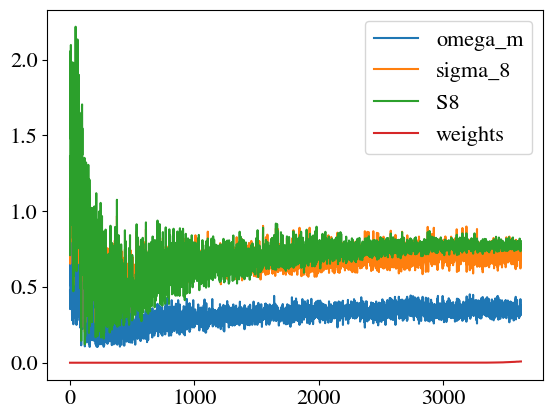

In [12]:
plt.plot(des_omega_m,label='omega_m')
plt.plot(des_sigma_8,label='sigma_8')
plt.plot(des_sigma_8*(des_omega_m/0.3)**0.5,label='S8')
plt.plot(des_weight,label='weights')
plt.legend()

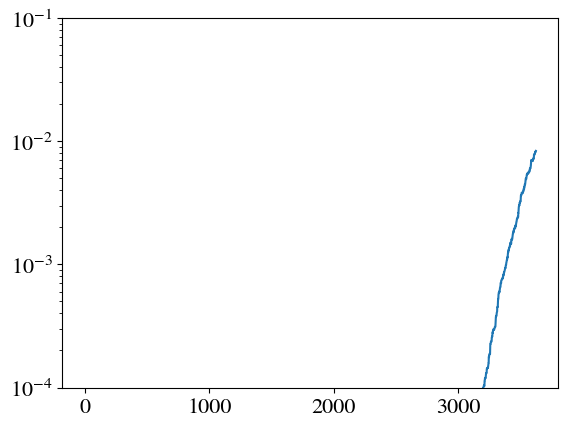

In [13]:
plt.plot(des_weight)
plt.ylim(0.0001,0.1)
plt.yscale('log')

In [14]:

names = ['sigma8','Ombc']
labels =  [r'\sigma_8',r'\Omega_m']
samps = [des_sigma_8,des_omega_m]
samples = MCSamples(samples=samps,names = names, labels = labels,
                    # weights = des_weight,
                    settings={'ignore_rows':0.8}
                   )
p = samples.getParams()
samples.addDerived(p.sigma8*(p.Ombc/0.3)**0.5,name='S8d5',label=r'S_8')
samples.updateBaseStatistics()
Fs = samples.getInlineLatex('S8d5',limit=1)
print('S8d5: ',Fs)

Removed 0.8 as burn in
S8d5:  S_8 = 0.773^{+0.023}_{-0.026}


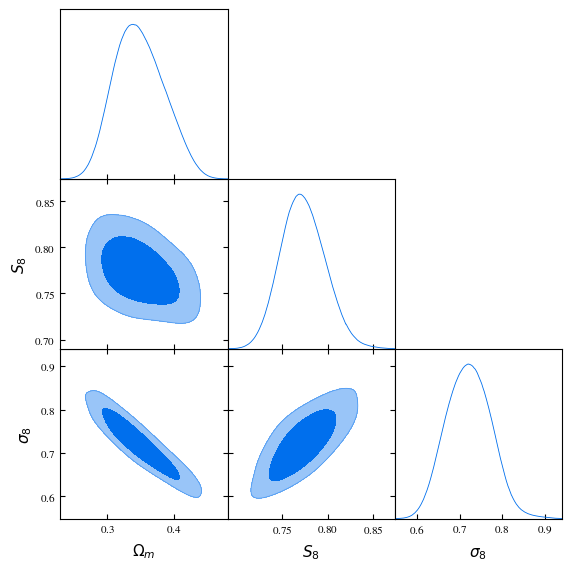

In [15]:
g = plots.get_subplot_plotter()
g.triangle_plot([samples],
    ['Ombc','S8d5','sigma8',
    ], filled=True)